In [ ]:
%matplotlib inline

## Standard imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scipy.linalg as linalg
import numpy as np
import scipy as scp

np.random.seed(31415926)

## Utility functions

In [2]:
def mv_normal(m, C):
    """ Samples a multivariate normal of mean m and covariance C
    Example:
    >>> m = np.array([0., 0.])
    >>> C = np.eye(2)
    >>> mv_normal(m, C).size
    2
    """
    sample = np.random.randn(*m.shape)
    return m + linalg.cholesky(C, lower=True) @ sample

In [3]:
def rmse(x, y):
    """ Root mean square error between two vectors x and y
    Example:
    >>> x = np.ones(10)
    >>> y = np.ones(10) * 0.5
    >>> rmse(x, y)
    0.5
    """
    return np.sqrt(np.mean(np.square(x-y)))

In [4]:
m= np.array([0,1]); C=np.matrix([[2,0],[2,3]])
mv_normal(m, C)

array([2.32675235, 2.62756843])

In [11]:
2*np.array([2,3])
beta = 8.0/3;  sigma = 10.0;  rho = 28.0;
pars = (beta,sigma,rho)

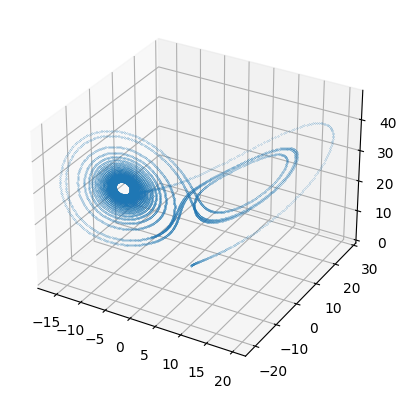

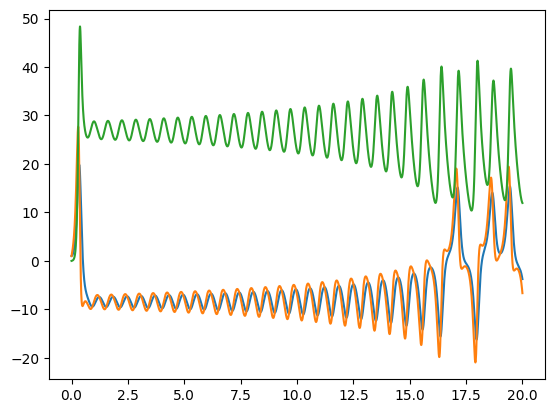

In [95]:
def lorentz_rhs(xin, tin, pars):
  frhs = xin*0.0
  beta, sigma, rho = pars
  x, y, z = xin
  frhs[0] = sigma * (y - x)
  frhs[1] = x * (rho - z) - y
  frhs[2] = x * y - beta * z

  return frhs

t = np.linspace(0,20,10000)
xinit1= [1,1,0]
xtraj1 = scp.integrate.odeint(lorentz_rhs, xinit1, t, (pars,))
xtraj1

ax = plt.figure().add_subplot(projection='3d')
ax.plot(xtraj1[:,0], xtraj1[:,1], xtraj1[:,2], '.', ms=0.3)
plt.show()
plt.plot(t, xtraj1[:,0])
plt.plot(t, xtraj1[:,1])
plt.plot(t, xtraj1[:,2])

In [19]:
def compute_obs_traj(equation, t, pars, obs_error, xin):
    xtrue= scp.integrate.odeint(lorentz_rhs, xin, t, (pars,))
    y_obs= xtrue*0.0
    for i in range(len(t)):
        y_obs[i] = obs_error.dot(xtrue[i]) + np.sqrt(r) * np.random.randn()
    print(y_obs)
    return xtrue, y_obs

t = np.linspace(0,20,100)
xin= [1,1,1]
hobs= np.eye(3)
r = 0.5
xtrue, y_obs= compute_obs_traj(lorentz_rhs, t, pars, hobs, xin)
y_obs.shape

[[  0.38800863   0.38800863   0.38800863]
 [  6.39331486  13.72454615   4.04681824]
 [ 14.743088    -0.05370548  46.25379341]
 [ -3.37926527  -6.41139746  28.12790291]
 [ -8.35050672  -9.77210142  26.20593513]
 [ -8.20205738  -7.07777233  30.41676072]
 [ -7.05486945  -6.80685819  25.81262607]
 [ -8.87787937 -10.24736682  25.13881152]
 [ -8.89483218  -7.84420433  30.10077022]
 [ -6.24431942  -5.80028632  26.81752361]
 [ -9.15370911 -10.60169513  24.23010752]
 [ -8.61434823  -7.70543706  30.69967919]
 [ -6.62303384  -5.95915024  26.72722235]
 [ -7.36643224  -8.8570808   25.35279304]
 [ -8.48105975  -7.78424127  31.0605459 ]
 [ -7.84566741  -6.93651664  25.90314822]
 [ -9.22762218 -10.71788036  22.81503066]
 [-10.95120993 -10.5466204   28.68015232]
 [ -6.63101453  -5.45129024  27.64435528]
 [ -7.78473956  -9.22496641  23.59446657]
 [-10.32929799 -10.30213569  29.19651239]
 [ -6.44832565  -4.97499659  28.50127877]
 [ -8.95768792 -10.29243803  21.80202639]
 [-10.75699062 -11.18847406  28.40

(100, 3)

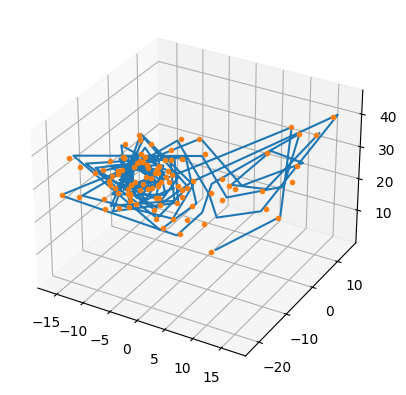

In [24]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(xtrue[:,0], xtrue[:,1],xtrue[:,2], "-")
ax.plot(y_obs[:,0], y_obs[:,1],y_obs[:,2], '.')
plt.show()

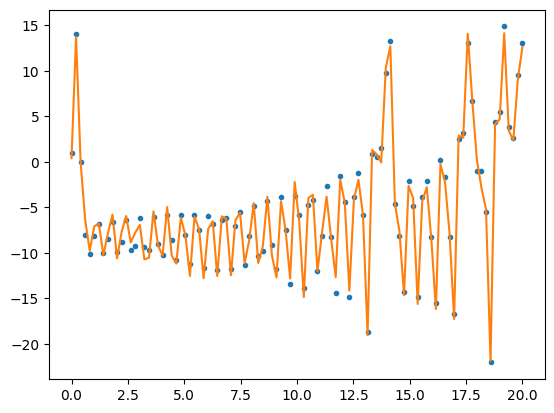

In [22]:
plt.plot(t, xtrue[:,1], '.')
plt.plot(t, y_obs[:,1])

In [78]:
# def lotka_volterra_rhs(x, pars):
#   # frhs = x*0.0
#   # a, b, d, g = pars
#   frhs= pars@xin.T

#   return frhs.T
def compute_dvec_lorentz(xvec, pars):
  frhs = xvec*0.0
  beta, sigma, rho = pars
  x, y, z = xvec
  frhs[0] = sigma * (y - x)
  frhs[1] = x * (rho - z) - y
  frhs[2] = x * y - beta * z
  
  return frhs
def generate_true(xin, time):
  frhs = xin*0.0
  store_vec= []
  
  vec= np.array(xin)
  for t in range(1, len(time)):
    store_vec.append(vec)
    dvec= compute_dvec_lorentz(vec, pars)
    dt= time[t]-time[t-1]
    
    # print(np.array(dt*dvec)[0]); print(type(dt*dvec))
    vec= vec + np.array(dt*dvec)
    # print(dt*dvec)
  store_vec.append(vec)

  return np.array(store_vec)

def lotka_volterra_forward(xin, time, pars, K, y_obs, H):
  frhs = xin*0.0
  store_vec= []
  # a, b, d, g = pars
  # x, y = xin
  vec= xin
  for t in range(1, len(time)):
    store_vec.append(vec)
    gain_vec= K*(y_obs[t].T- H@xin.T)
    dvec= compute_dvec_lorentz(vec, pars) + gain_vec
    dt= time[t]-time[t-1]
    # print(dt*dvec)
    vec= vec + np.array(dt*dvec)[0]
  store_vec.append(vec)

  return np.array(store_vec)

def lotka_volterra_backward(x_tilda, time, pars, K_prime, y_obs, H):

  store_vec= []
  vec= x_tilda.copy()
  
  for t in range(len(time)-1, 0, -1):
    store_vec.append(vec)
    gain_vec= K_prime*(y_obs[t].T- H@x_tilda.T)
    dvec= compute_dvec_lorentz(vec, pars) - gain_vec
    dt= time[t]-time[t-1]
    # print(dt*dvec)
    vec= vec - np.array(dt*dvec)[0]
  store_vec.append(vec)

  return np.flip(store_vec, axis=0)


def back_forth_nudge(pars, t, K, K_back, H, y_obs, number_of_iterations): #once
  store_backward, store_forward=[], []
  #tilta, normal
  xin= np.mean(y_obs, axis=0)
  nudge= lotka_volterra_forward(xin, t, pars, K, y_obs, hobs)
  store_forward.append(nudge)
  for it in range(number_of_iterations):
    nudge_back= lotka_volterra_backward(nudge[-1], t, pars, K_back, y_obs, H)
    nudge= lotka_volterra_forward(nudge_back[0], t, pars, K, y_obs, H)
    store_backward.append(nudge_back)
    store_forward.append(nudge)
    print(f"done for {it}")
  return store_forward, store_backward
          

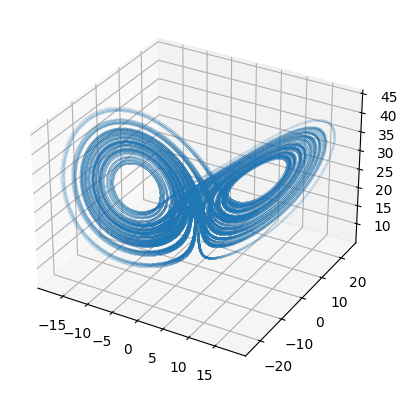

In [49]:
t = np.linspace(0,50,100000)
xin= np.array([-5.34895656, -1.15005592, 28.92088666])
xtrue= generate_true(xin, t)
# plt.plot(t, xtrue[:,1], '.')
ax = plt.figure().add_subplot(projection='3d')
ax.plot(xtrue[:,0], xtrue[:,1],xtrue[:,2], ".", ms=0.1)

[[-5.61859817 -1.33571952 29.33664191]
 [-4.94807397 -0.68351122 29.94955605]
 [-5.62708668 -1.38085608 29.21305256]
 ...
 [ 7.3159156  11.84746502 16.92805197]
 [ 7.19979526 11.74433709 16.80850812]
 [ 6.25214154 10.80965473 15.85759768]]


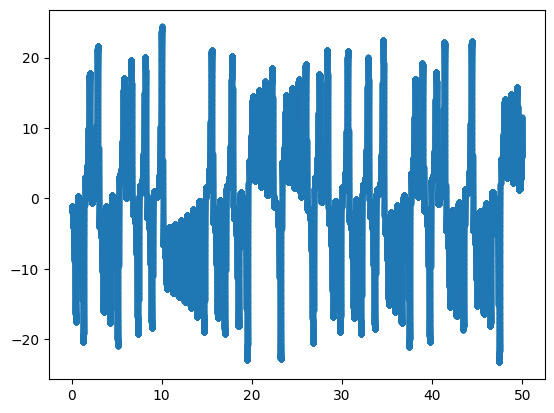

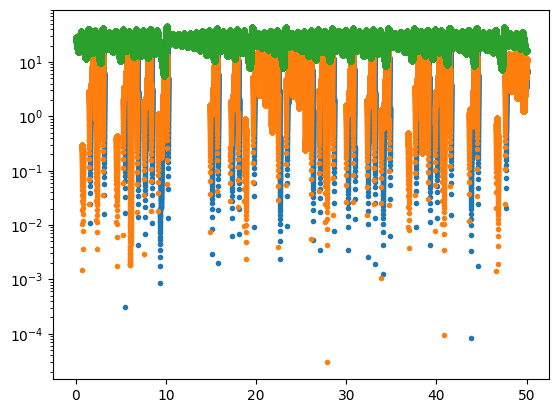

In [94]:
t = np.linspace(0,50,100000)
xin= np.array([-5.34895656, -1.15005592, 28.92088666])
pars= pars
hobs= np.eye(3)*1.02
r = 1

xtrue= generate_true(xin, t)
y_obs= xtrue*0.0
for i in range(len(t)):
    y_obs[i] = hobs.dot(xtrue[i]) + np.sqrt(r) * np.random.randn()
print(y_obs)
    
    
# xtrue, y_obs= compute_obs_traj(lotka_volterra_rhs, t, pars, hobs, xin)
# y_obs.shape

plt.plot(t, xtrue[:,1], '.')
plt.show()
plt.semilogy(t, xtrue, '.')
# lotka_volterra_forward(y_obs, t, )

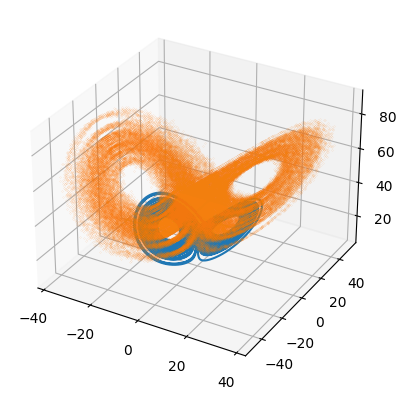

In [93]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(xtrue[:,0], xtrue[:,1],xtrue[:,2], "-", ms=0.1)
ax.plot(y_obs[:,0], y_obs[:,1],y_obs[:,2], '.', ms=0.1)
plt.show()

In [55]:
np.mean(y_obs, axis=0)

array([-0.80290676, -0.77789746, 23.52227043])

In [72]:
xin= np.mean(y_obs, axis=0)
nudge= lotka_volterra_forward(xin, t, pars, 0.2, y_obs, hobs)
nudge_back= lotka_volterra_backward(nudge[-1], t, pars, 0.01, y_obs, hobs)
nudge= lotka_volterra_forward(nudge_back[0], t, pars, 0.2, y_obs, hobs)
nudge_back= lotka_volterra_backward(nudge[-1], t, pars, 0.1, y_obs, hobs)
# plt.semilogy(t, xtrue, '.')
# plt.semilogy(t, y_obs, '.')
# plt.semilogy(t, nudge, label="forward")
# plt.semilogy(t, np.flip(nudge_back, axis=0), label="back", color="black")
# plt.legend()

array([[-288.40275436, -288.37774505, -264.07757716],
       [-288.39902391, -288.3740146 , -264.07384671],
       [-288.39518174, -288.37017243, -264.07000454],
       ...,
       [  67.96458559,   67.98959489,   92.28976279],
       [  67.96771435,   67.99272366,   92.29289155],
       [  67.97094686,   67.99595617,   92.29612406]])

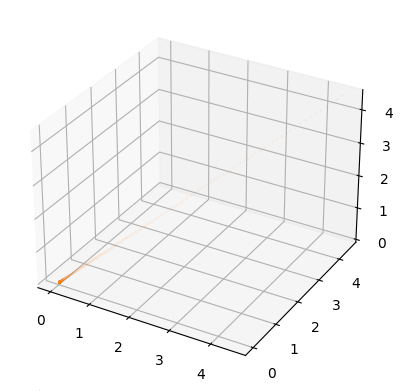

In [61]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(xtrue[:,0], xtrue[:,1],xtrue[:,2], "-", ms=0.1)
# ax.plot(y_obs[:,0], y_obs[:,1],y_obs[:,2], '.', ms=0.1)
ax.plot(nudge[:,0], nudge[:,1],nudge[:,2], '.', ms=0.1)
plt.show()

In [ ]:
print(nudge[-1])
print(nudge_back[0])
print(np.flip(nudge_back, axis=0)[-1])

[594.65069315  21.0060061 ]
[7.1199285  2.62280737]
[7.1199285  2.62280737]


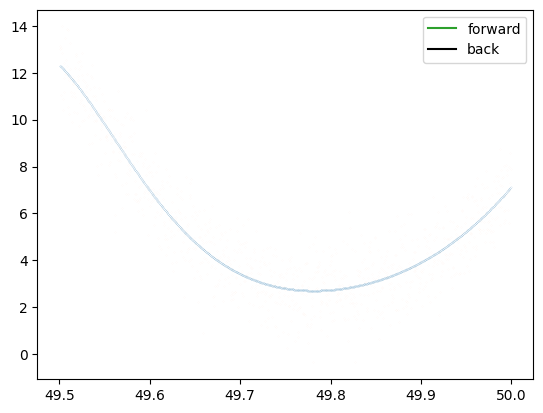

In [67]:
# xin= np.mean(y_obs, axis=0)
# nudge= lotka_volterra_forward(xin, t, pars, 0.2, y_obs, hobs)
# nudge_back= lotka_volterra_backward(nudge[-1], t, pars, 0.1, y_obs, hobs)
nudge= lotka_volterra_forward(nudge_back[0], t, pars, 0.1, y_obs, hobs)
nudge_back= lotka_volterra_backward(nudge[-1], t, pars, 0.1, y_obs, hobs)
plt.plot(t[-1000:-1], xtrue[:,0][-1000:-1], '.', ms=0.1)
plt.plot(t[-1000:-1], y_obs[:,0][-1000:-1], '.', ms=0.1, alpha=0.2)
plt.plot(t[-1000:-1], nudge[:,0][-1000:-1], label="forward", ms=0.1)
plt.plot(t[-1000:-1], nudge_back[:,0][-1000:-1], label="back", color="black", ms=0.1)
plt.legend()

In [68]:
nudge

array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       ...,
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]])

In [ ]:
t = np.linspace(0,2,100)
xin= np.array([1.,1.])
pars= np.matrix([[2.,0.],[0.,0.]])
hobs= np.array([[1.,0.],[0.,1.]])
cov_obs= np.array([[1.,1.],[0.,1.]])
r = 1

xtrue= generate_true(xin, t)
y_obs= xtrue*0.0
for i in range(len(t)):
    y_obs[i] = hobs.dot(xtrue[i]) + np.random.multivariate_normal(mean= [0,0], cov= cov_obs)
# print(y_obs)



[0.04040404 0.        ]
<class 'numpy.matrix'>
[0.04203653 0.        ]
<class 'numpy.matrix'>
[0.04373497 0.        ]
<class 'numpy.matrix'>
[0.04550204 0.        ]
<class 'numpy.matrix'>
[0.04734051 0.        ]
<class 'numpy.matrix'>
[0.04925326 0.        ]
<class 'numpy.matrix'>
[0.05124329 0.        ]
<class 'numpy.matrix'>
[0.05331372 0.        ]
<class 'numpy.matrix'>
[0.05546781 0.        ]
<class 'numpy.matrix'>
[0.05770894 0.        ]
<class 'numpy.matrix'>
[0.06004061 0.        ]
<class 'numpy.matrix'>
[0.06246649 0.        ]
<class 'numpy.matrix'>
[0.06499039 0.        ]
<class 'numpy.matrix'>
[0.06761627 0.        ]
<class 'numpy.matrix'>
[0.07034824 0.        ]
<class 'numpy.matrix'>
[0.07319059 0.        ]
<class 'numpy.matrix'>
[0.07614779 0.        ]
<class 'numpy.matrix'>
[0.07922446 0.        ]
<class 'numpy.matrix'>
[0.08242545 0.        ]
<class 'numpy.matrix'>
[0.08575577 0.        ]
<class 'numpy.matrix'>
[0.08922065 0.        ]
<class 'numpy.matrix'>
[0.09282553 0

C:\Users\adity\AppData\Local\Temp\ipykernel_8612\845605636.py:11: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  y_obs[i] = hobs.dot(xtrue[i]) + np.random.multivariate_normal(mean= [0,0], cov= cov_obs)


In [ ]:
np.linalg.inv(cov_obs)

array([[ 1., -1.],
       [ 0.,  1.]])

In [79]:
K, K_back= 1,1
H= hobs
store_for, store_back=  back_forth_nudge(pars, t, K, K_back, H, y_obs, 10)

done for 0
done for 1
done for 2
done for 3
done for 4
done for 5
done for 6
done for 7
done for 8
done for 9


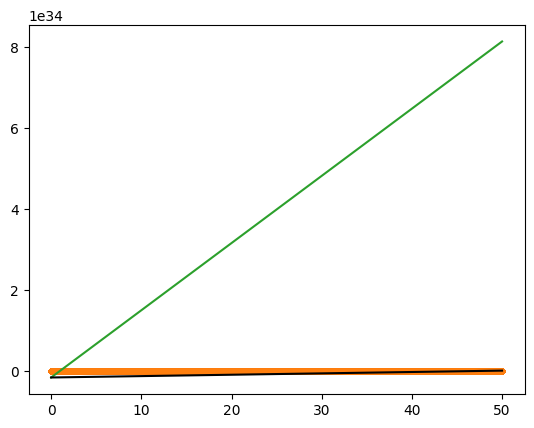

In [82]:

# plt.semilogy(t, y_obs, '.')
# for it in range(len(store_back)):
#     plt.semilogy(t, store_for[it])
#     plt.semilogy(t, store_back[it])

plt.plot(t, xtrue[:,0], '.')
plt.plot(t, y_obs[:,0], '.')
plt.plot(t, store_for[-1][:,0], label="forward")
plt.plot(t,store_back[-1][:,0], label="back", color="black")

In [83]:
x_nonudge= generate_true(y_obs[0], t)

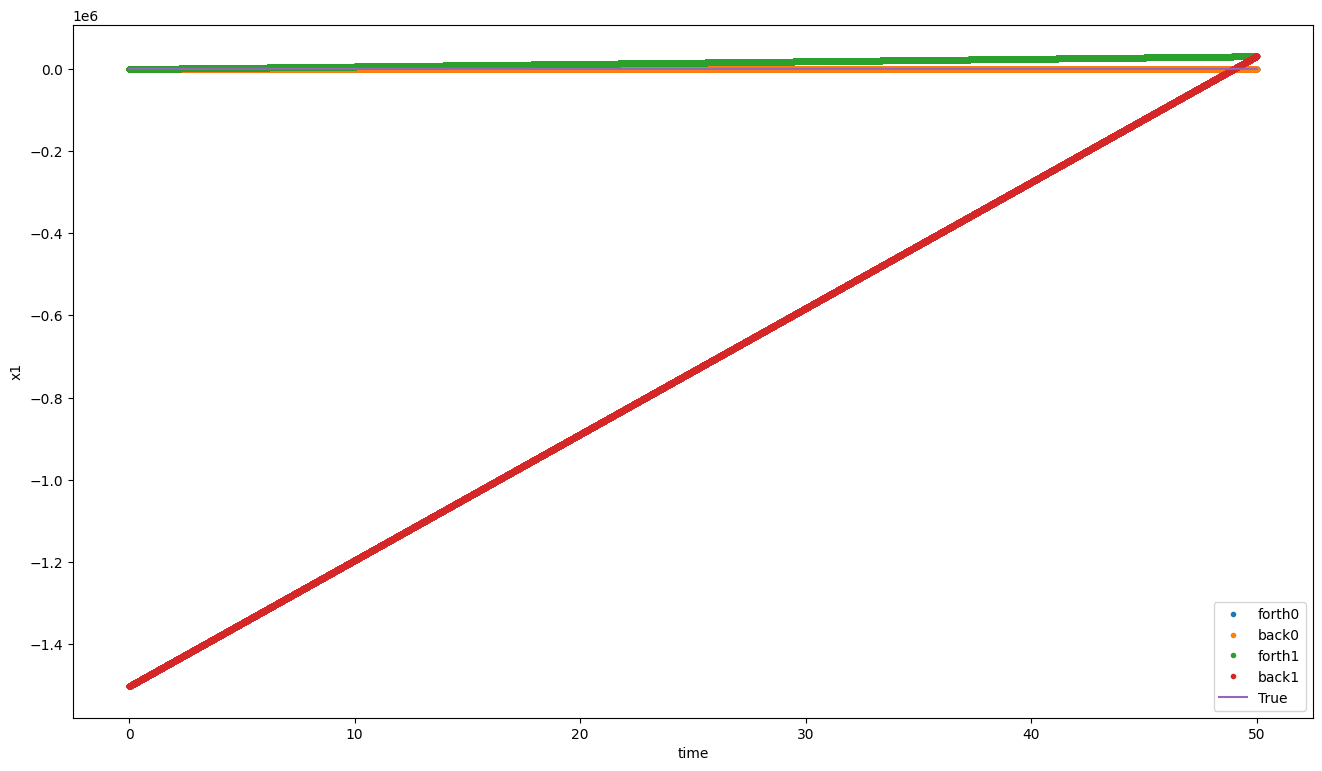

In [87]:
plt.figure(figsize=(16,9))
for it in range(2):
    plt.plot(t, store_for[it][:,0], ".", label= f"forth{it}")
    plt.plot(t, store_back[it][:,0], ".", label= f"back{it}")
plt.plot(t, xtrue[:,0], "-", label="True")
plt.xlabel("time"); plt.ylabel("x1")

plt.legend()

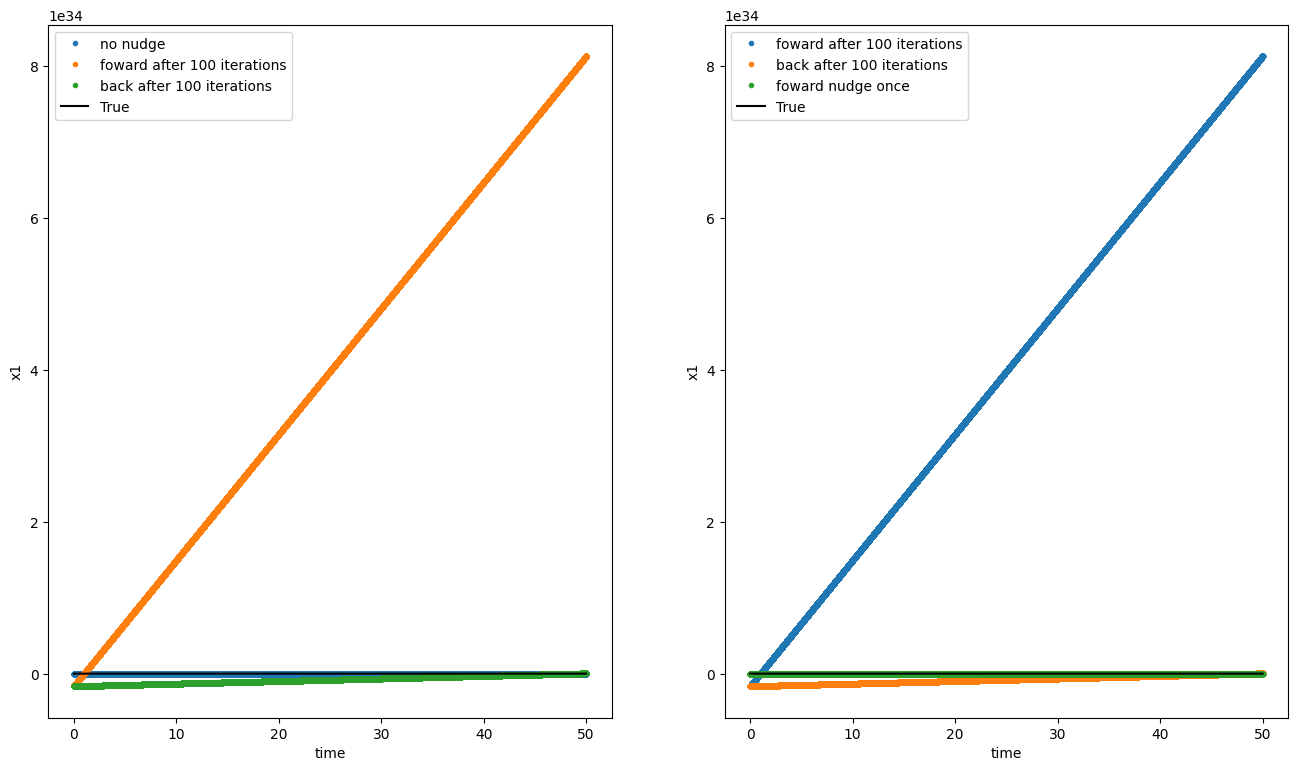

In [91]:
plt.figure(figsize=(16,9))
# for it in range(5):
plt.subplot(1,2,1)
it=-1

plt.plot(t, x_nonudge[:,0], ".", label="no nudge")
plt.plot(t, store_for[it][:,0], ".", label= f"foward after 100 iterations")
plt.plot(t, store_back[it][:,0], ".", label= f"back after 100 iterations")
plt.plot(t, xtrue[:,0], "-", label="True", color="black")
# plt.plot(t, store_for[1][:,0], ".", label= f"foward nudge once")
plt.xlabel("time"); plt.ylabel("x1")

plt.legend()

plt.subplot(1,2,2)
it=-1

# plt.plot(t, x_nonudge[:,0], ".", label="no nudge")
plt.plot(t, store_for[it][:,0], ".", label= f"foward after 100 iterations")
plt.plot(t, store_back[it][:,0], ".", label= f"back after 100 iterations")

plt.plot(t, store_for[1][:,0], ".", label= f"foward nudge once")
plt.plot(t, xtrue[:,0], "-", label="True", color="black")
plt.xlabel("time"); plt.ylabel("x1")

plt.legend()